In [13]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [14]:
def plot_dateset(X, y, axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0], 'bs')
    plt.plot(X[:,0][y==1],X[:,1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True,which='both')
    plt.xlabel(r'$x_1$', fontsize = 20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [11]:
iris =datasets.load_iris()
X = iris['data'][:,(2,3)] # petal length, petal width
y = (iris['target'] == 2).astype(np.float64) # iris-Virginica

# Linear SVM classification

In [5]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1,loss='hinge'))
])
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [7]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [ ]:
#### unlike logistic regression classifiers, SVM clfs do not output probabilities for each class

In [ ]:
# alternatively, we use the SGDClassifier(loss='hinge', alpha =1/(m*C)) to train a linear SVM classifer as well
# it does not converge as fast as te LinearSVC, but it can be useful to handle huge datasets that do not 
# fit in memory( out of core) or online classification tasks.

# Nonlinear SVM classification
even though linear svm are efficient and work well in many case, many datasets are not even close to being linearly separable.
One approach to handling nonlinear datasets is to add more features, such as polynomial features; 

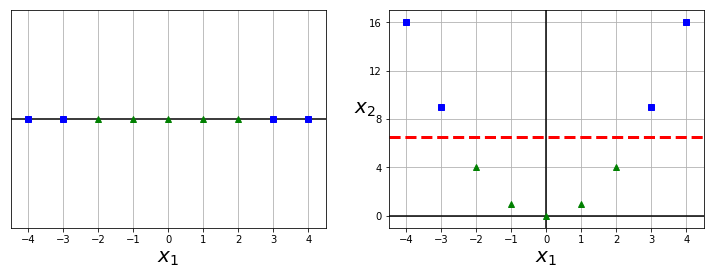

In [9]:

%matplotlib inline
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

#save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

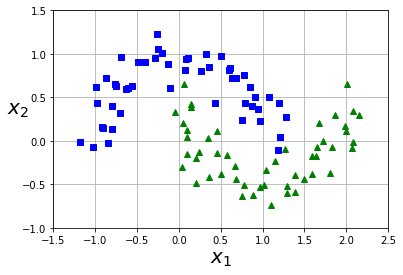

In [15]:
X, y = make_moons(n_samples= 100, noise = 0.15, random_state = 123)
plot_dateset(X, y, [-1.5,2.5,-1,1.5])
plt.show()

In [17]:
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge',random_state = 123))
])
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=123, tol=0.0001, verbose=0))])

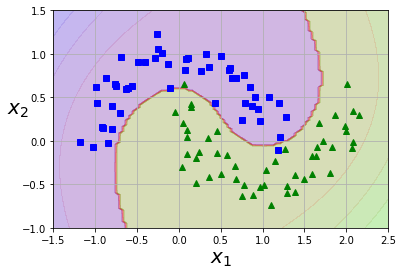

In [18]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5,2.5,-1,1.5])
plot_dateset(X, y, [-1.5,2.5,-1,1.5])

plt.show()

In [19]:
# alternative poly SVC ( the same as above)
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree = 3, coef0= 1, C= 5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

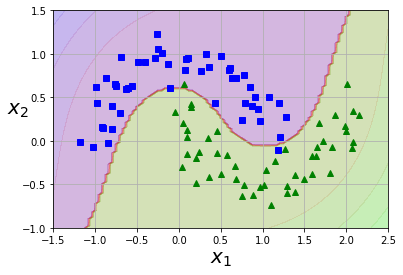

In [20]:
plot_predictions(poly_kernel_svm_clf, [-1.5,2.5,-1,1.5])
plot_dateset(X, y, [-1.5,2.5,-1,1.5])
plt.show()

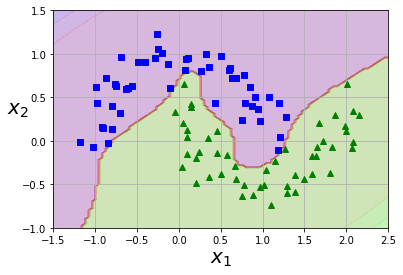

In [21]:
# try larger degree
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree = 10, coef0= 1, C= 5))
])
poly_kernel_svm_clf.fit(X, y)
plot_predictions(poly_kernel_svm_clf, [-1.5,2.5,-1,1.5])
plot_dateset(X, y, [-1.5,2.5,-1,1.5])
plt.show()  ## overfitting?

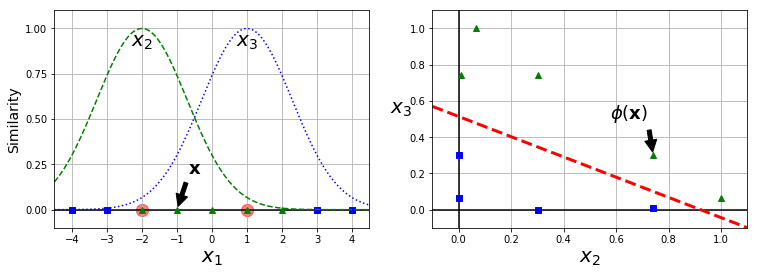

In [22]:
## another technique to handle nonlinear problems is to add features computed using a similarity function 
## that measures how much each instance resembles a particular landmark
def gaussian_rbf(x, landmark, gamma):  # gaussian radial basis function with gamma = 0.3
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma) # set the landmark of the gaussian_rbf
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

#save_fig("kernel_method_plot")
plt.show()

In [24]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


In [23]:
# alternative
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 0.001))
])
rbf_kernel_svm_clf.fit(X , y)
plot_predictions(rbf_kernel_svm_clf, [])

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

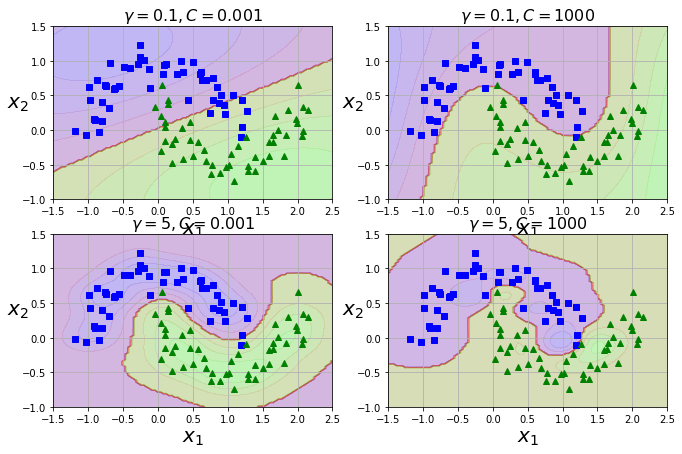

In [27]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dateset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

# SVM Regression
SVM algorithm is quite versatile: not only does it support linear and nonlinear classification, but it also supports linear and nonlinear regression. The trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street).

In [32]:
from sklearn.svm import LinearSVR
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [33]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

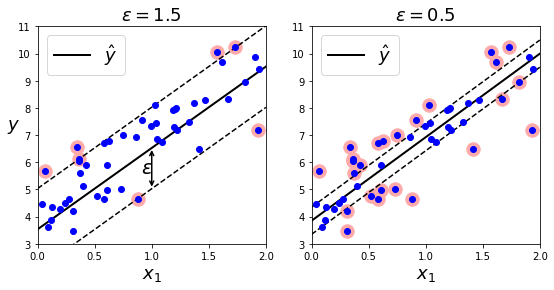

In [34]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

In [36]:
from sklearn import datasets
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = iris['target']

setosa_or_versicolor = (y==0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

C = 5
alpha = 1/(C *len(X))

lin_clf = LinearSVC(loss='hinge', C=C, random_state = 123)
svm_clf = SVC(kernel = 'linear', C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate = 'constant', eta0 = 0.001, alpha = alpha,
                       max_iter = 100000, tol = -np.infty, random_state = 123)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28473933] [[1.05364493 1.09902926]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.319] [[1.12098182 1.02688982]]


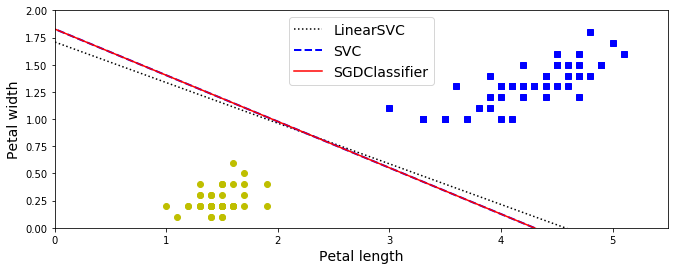

In [37]:
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

In [38]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', cache = False)
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist)
X, y = mnist["data"], mnist["target"]

In [40]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [41]:
rnd_idx = np.random.permutation(60000)
X_train = X_train[rnd_idx]
y_train = y_train[rnd_idx]

In [42]:
lin_clf = LinearSVC(random_state = 123)
lin_clf.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
     verbose=0)

In [43]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)
# bad at MNIST

0.8886

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_clf = LinearSVC(random_state = 123)
lin_clf.fit(X_train_scaled, y_train)
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.92135

In [45]:
svm_clf = SVC(decision_function_shape ='ovr', gamma = 'auto')
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9468666666666666

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {'gamma':reciprocal(0.001,0.1), 'C':uniform(1,10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter = 10, verbose = 2, cv = 3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=8.672598575312348, gamma=0.006929609303267635 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=8.672598575312348, gamma=0.006929609303267635, total=   0.8s
[CV] C=8.672598575312348, gamma=0.006929609303267635 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .. C=8.672598575312348, gamma=0.006929609303267635, total=   0.9s
[CV] C=8.672598575312348, gamma=0.006929609303267635 .................
[CV] .. C=8.672598575312348, gamma=0.006929609303267635, total=   0.9s
[CV] C=8.925471905182384, gamma=0.001262542307589235 .................
[CV] .. C=8.925471905182384, gamma=0.001262542307589235, total=   0.6s
[CV] C=8.925471905182384, gamma=0.001262542307589235 .................
[CV] .. C=8.925471905182384, gamma=0.001262542307589235, total=   0.6s
[CV] C=8.925471905182384, gamma=0.001262542307589235 .................
[CV] .. C=8.925471905182384, gamma=0.001262542307589235, total=   0.6s
[CV] C=8.655274047166163, gamma=0.0187333598108448 ...................
[CV] .... C=8.655274047166163, gamma=0.0187333598108448, total=   0.8s
[CV] C=8.655274047166163, gamma=0.0187333598108448 ...................
[CV] .... C=8.655274047166163, gamma=0.0187333598108448, total=   0.9s
[CV] C=8.655274047166163, gamma=0.0187333598108448 ...................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   37.8s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000157CFD45CF8>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000157CFD45C50>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [49]:
rnd_search_cv.best_estimator_

SVC(C=8.925471905182384, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001262542307589235,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
rnd_search_cv.best_score_

0.873

In [51]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)   ### seems pretty legit 

0.999

train an SVM regressor on the California housing dataset.

In [65]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
#try LinearSVC first
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)


D:\anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [70]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
print('mse: ',mse)
rmse = np.sqrt(mse)
print('rmse: ', rmse)


mse:  0.9612806653297273
rmse:  0.9804492160890983


In [71]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {'gamma':reciprocal(0.001,0.1), 'C':uniform(1,10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter = 10, verbose = 2, cv = 3, random_state =123)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=7.964691855978616, gamma=0.0037348973478010345 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . C=7.964691855978616, gamma=0.0037348973478010345, total=   4.3s
[CV] C=7.964691855978616, gamma=0.0037348973478010345 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV] . C=7.964691855978616, gamma=0.0037348973478010345, total=   4.3s
[CV] C=7.964691855978616, gamma=0.0037348973478010345 ................
[CV] . C=7.964691855978616, gamma=0.0037348973478010345, total=   4.3s
[CV] C=3.268514535642031, gamma=0.01266570994661668 ..................
[CV] ... C=3.268514535642031, gamma=0.01266570994661668, total=   4.2s
[CV] C=3.268514535642031, gamma=0.01266570994661668 ..................
[CV] ... C=3.268514535642031, gamma=0.01266570994661668, total=   4.4s
[CV] C=3.268514535642031, gamma=0.01266570994661668 ..................
[CV] ... C=3.268514535642031, gamma=0.01266570994661668, total=   4.4s
[CV] C=8.19468969785563, gamma=0.007017992831138442 ..................
[CV] ... C=8.19468969785563, gamma=0.007017992831138442, total=   4.5s
[CV] C=8.19468969785563, gamma=0.007017992831138442 ..................
[CV] ... C=8.19468969785563, gamma=0.007017992831138442, total=   4.4s
[CV] C=8.19468969785563, gamma=0.007017992831138442 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000157CFE18E48>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000157CFE18BA8>},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [72]:
rnd_search_cv.best_estimator_

SVR(C=4.980442553304314, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.029922013287804066, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
print('mse: ', mse)
rmse = np.sqrt(mse)
print('rmse: ', rmse)


mse:  0.37146706768867105
rmse:  0.6094809822206687


In [75]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print('mse: ', mse)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

mse:  0.388332654930362
rmse:  0.623163425539691
